In [10]:
import numpy as np
import matplotlib.pyplot as plt

In [11]:
def exp_logistic_map_2d(mu1, b1, mu2, b2, r, x0, y0, n):
    xs, ys = np.zeros(n), np.zeros(n)
    xs[0], ys[0] = x0, y0
    for i in range(1, n):
        xs[i] = mu1 * xs[i-1] * np.exp(-(xs[i-1] - b1)**2) + r * xs[i-1] * ys[i-1]
        ys[i] = mu2 * ys[i-1] * np.exp(-(ys[i-1] - b2)**2) + r * xs[i-1] * ys[i-1]
        xs[i] = np.clip(xs[i], -10, 10)
        ys[i] = np.clip(ys[i], -10, 10)
    return xs, ys

In [12]:
def plot_time_series(xs, ys, n_show=300):
    import matplotlib.pyplot as plt
    plt.figure(figsize=(10,3))
    plt.plot(xs[:n_show], label='x')
    plt.plot(ys[:n_show], label='y')
    plt.xlabel('n')
    plt.title('Time Series')
    plt.legend()
    plt.grid(True)
    plt.show()

In [13]:
def plot_phase_space(xs, ys, n_start=200):
    import matplotlib.pyplot as plt
    plt.figure(figsize=(5,5))
    plt.scatter(xs[n_start:], ys[n_start:], s=1, alpha=0.5)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Phase Space')
    plt.show()

In [14]:
def bifurcation_diagram_2d(mu1_range, mu2, b1, b2, r, x0, y0, n_iter=600, n_show=40):
    xs_plot, mus = [], []
    for mu1 in mu1_range:
        xs, ys = exp_logistic_map_2d(mu1, b1, mu2, b2, r, x0, y0, n_iter)
        xs_plot.extend(xs[-n_show:])
        mus.extend([mu1]*n_show)
    plt.figure(figsize=(10,4))
    plt.scatter(mus, xs_plot, s=0.2, c='blue')
    plt.xlabel('mu1')
    plt.ylabel('x')
    plt.title(f'Bifurcation Diagram (vary mu1, mu2={mu2})')
    plt.show()

In [15]:
def lyapunov_exponent_2d(mu1, b1, mu2, b2, r, x0, y0, n):
    xs, ys = np.zeros(n), np.zeros(n)
    xs[0], ys[0] = x0, y0
    le_sum = 0.0
    for i in range(1, n):
        xs[i] = mu1 * xs[i-1] * np.exp(-(xs[i-1] - b1)**2) + r * xs[i-1] * ys[i-1]
        ys[i] = mu2 * ys[i-1] * np.exp(-(ys[i-1] - b2)**2) + r * xs[i-1] * ys[i-1]
        dfdx = mu1 * np.exp(-(xs[i-1]-b1)**2) * (1 - 2*xs[i-1]*(xs[i-1]-b1)) + r*ys[i-1]
        dfdx = abs(dfdx)
        if dfdx > 0:
            le_sum += np.log(dfdx)
    return le_sum/(n-1)

def lyapunov_diagram(mu1_range, mu2, b1, b2, r, x0, y0, n_iter=600):
    les = [lyapunov_exponent_2d(mu1, b1, mu2, b2, r, x0, y0, n_iter) for mu1 in mu1_range]
    plt.figure(figsize=(10,4))
    plt.plot(mu1_range, les, lw=1)
    plt.xlabel('mu1')
    plt.ylabel('Lyapunov Exponent (x)')
    plt.title(f'Lyapunov Diagram (vary mu1, mu2={mu2})')
    plt.axhline(0, color='gray', linestyle='--')
    plt.show()

In [16]:
def plot_histogram(xs, ys, bins=40):
    import matplotlib.pyplot as plt
    plt.figure(figsize=(10,4))
    plt.hist(xs, bins=bins, alpha=0.6, label='x', color='blue')
    plt.hist(ys, bins=bins, alpha=0.6, label='y', color='orange')
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.title('Histogram of x and y')
    plt.legend()
    plt.grid(True)
    plt.show()

In [17]:
def encrypt_chaos(message_bytes, xs):
    key = (np.abs(xs*1e5) % 256).astype('uint8')
    key = key[:len(message_bytes)]
    cipher = np.bitwise_xor(np.frombuffer(message_bytes, dtype='uint8'), key)
    return cipher

def decrypt_chaos(cipher, xs):
    key = (np.abs(xs*1e5) % 256).astype('uint8')
    key = key[:len(cipher)]
    decrypted = np.bitwise_xor(cipher, key)
    return decrypted.tobytes()

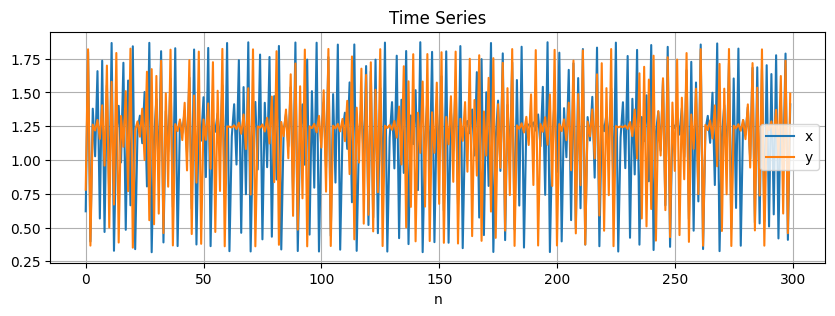

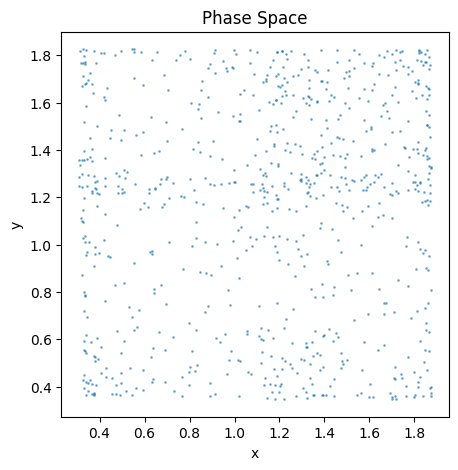

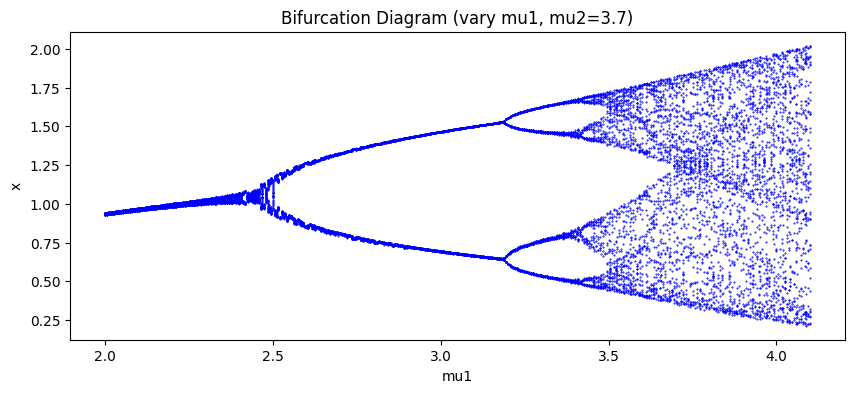

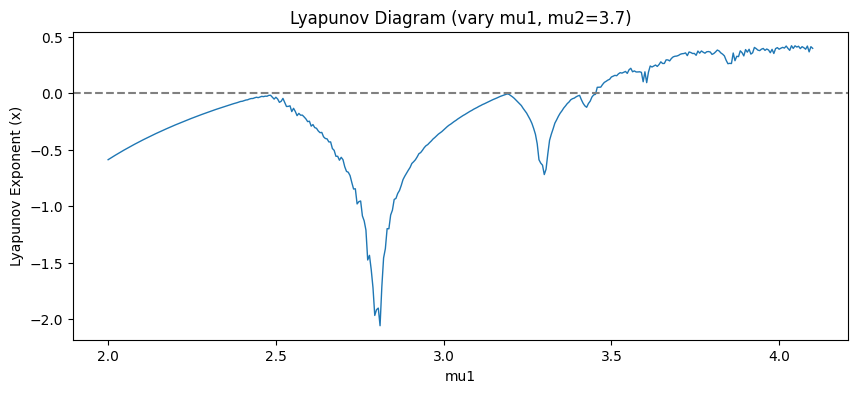

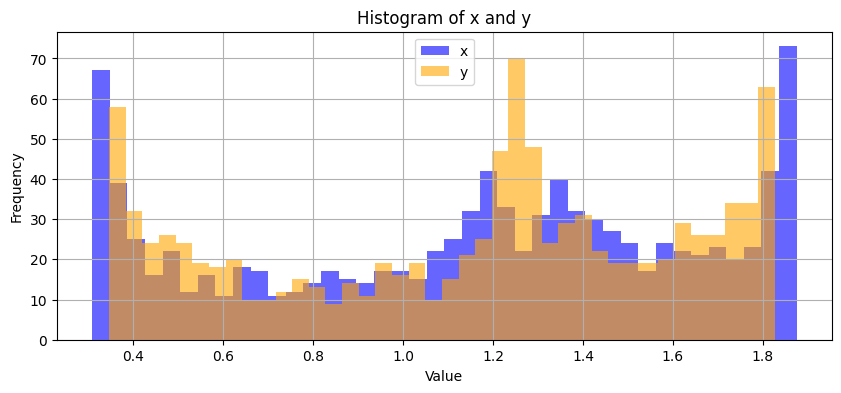

Pesan asli : b'rusak sudah pikiranku dengan kripto ini'
Cipher     : [ 10  24 241  96 102  49  19 184 244  16  75  10  59  29 154 212 239 202
 152  93 202 250  88 190 223  64 220 163  45  74  25   2 176 129 175 236
  54 170  97]
Hasil dekripsi: rusak sudah pikiranku dengan kripto ini


In [18]:
# Gunakan parameter ini untuk chaos (jangan pakai x0, y0 kecil!)
mu1, b1 = 3.8, 0.1
mu2, b2 = 3.7, 0.1
r = 0.005                     # Lebih kecil dari 0.05
x0, y0 = 0.62, 0.78           # Buat beda!
n = 1000

xs, ys = exp_logistic_map_2d(mu1, b1, mu2, b2, r, x0, y0, n)
plot_time_series(xs, ys)
plot_phase_space(xs, ys)

# Bifurcation
mu1_range = np.linspace(2.0, 4.1, 400)
bifurcation_diagram_2d(mu1_range, mu2, b1, b2, r, x0, y0, n_iter=600, n_show=40)

# Lyapunov
lyapunov_diagram(mu1_range, mu2, b1, b2, r, x0, y0, n_iter=600)

# Histogram
plot_histogram(xs, ys)

# Enkripsi-Dekripsi
pesan = "rusak sudah pikiranku dengan kripto ini".encode()
xs_cr, _ = exp_logistic_map_2d(mu1, b1, mu2, b2, r, 0.91, 0.87, len(pesan)+20)
cipher = encrypt_chaos(pesan, xs_cr)
plaintext = decrypt_chaos(cipher, xs_cr)
print("Pesan asli :", pesan)
print("Cipher     :", cipher)
print("Hasil dekripsi:", plaintext.decode())